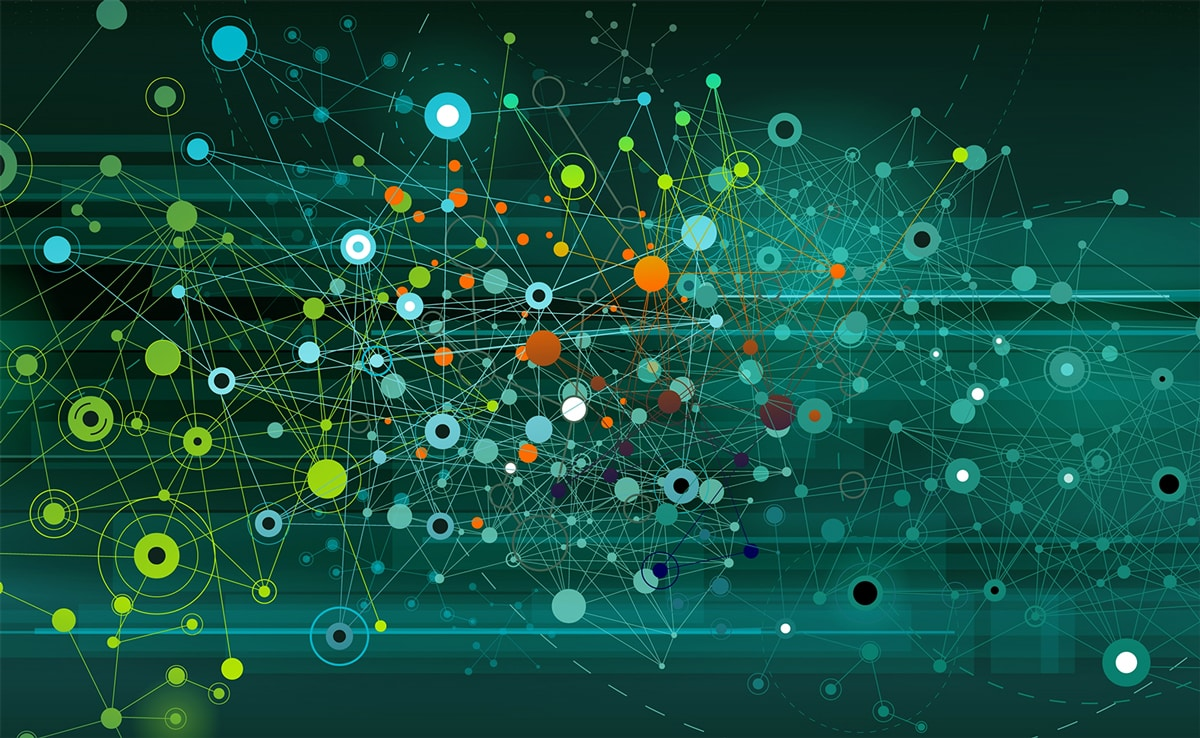
# Phase 1



## Introduction

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from PIL import Image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [18]:
import pathlib
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# dataset_url = "G:\EXIA\A5\Data-science\Projet-Leyenda\Datasets"

# data_dir = tf.keras.utils.get_file('Photo', origin=dataset_url, extract=True)
# data_dir = pathlib.Path(data_dir)
data_dir =  "G:\EXIA\A5\Data-science\DATASETS"

image_h = 180
image_w = 180
batch_s = 32

train_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels = "inferred",
  validation_split= 0.8, 
  subset = "training",
  seed=42,
  batch_size=batch_s,
  image_size=(image_h, image_w),
)

# Le test_set
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels = "inferred",
  validation_split= 0.2,
  subset = "validation",
  seed=42,
  batch_size=batch_s,
  image_size=(image_h, image_w),
)

class_names = train_set.class_names
print(class_names)

Found 41405 files belonging to 5 classes.
Using 8281 files for training.
Found 41405 files belonging to 5 classes.
Using 8281 files for validation.
['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']


## Visualisation

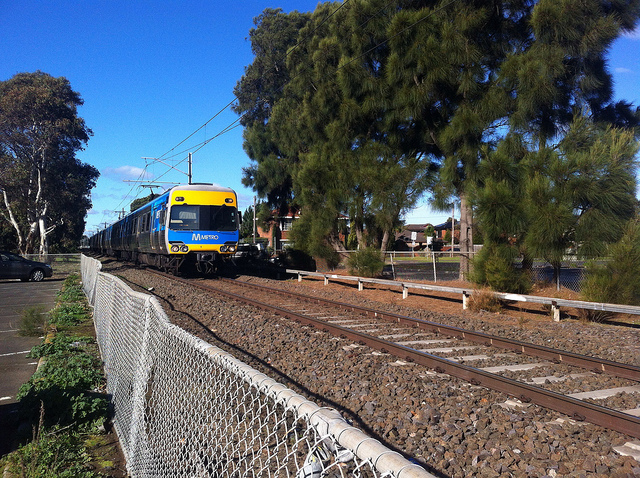

In [28]:
# 
# PIL.Image.open(str(data_dir + '\\Photo\\photo_0001.jpg'))

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):
#     print(images)
    for i in range(9):
        ax =  plt.subplot(3, 3, i + 1)
        plt.title(class_names[labels[i]])
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("on")
        

### Batch info

In [23]:
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


### Sorting black and white image

In [12]:



def removeBlackAndWhite():
    for image in data_dir:
        with Image.open(image) as im:
            colors = im.getcolors()
        print(colors)
        # if que du noir, remove l'image

